Note: If you are using the Google Colab and want to use tensorflow < 2: you will have to downgrade using this link. https://colab.research.google.com/notebooks/tensorflow_version.ipynb

# Sentiment Analysis on IMDB Movie Review dataset

Sentiment analysis is one of the key areas of research in NLP and Sequence modelling. We will be using LSTMs and Bi-directional LSTMs to predict two classes - positive or negative sentiment.


You will be reading the dataset from here: https://drive.google.com/file/d/127PCwycL0oToSF6l-c2oFuBkacYsmlgK/view?usp=sharing

You can use this blog for understanding: https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [124]:
%tensorflow_version 1.x
import re
import nltk
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
import pandas as pd 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Bidirectional, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

All the relevant libraries are imported. 
You are free to change as you please. 
Using the GPU backend is recommended as LSTMs are computationally expensive to train.



## Data handling - exploration and cleaning





1.   You are expected to read the dataset into a dataframe.
2.   This is a real world dataset and you will be expected to clean the dataset.

1.   This includes removing trailing spaces and HTML tags.






In [0]:
df = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv')

### Data Cleaning - write the techniques you employed and the achieved results

In [0]:
def unique_list(lis):
    mylist = []
    [mylist.append(x) for x in lis if x not in mylist]
    return mylist
def get_tokens(inputData):
    myReviews = inputData['review']
    tokens = nltk.word_tokenize(myReviews)
    return  [i for i in tokens if i.isalpha()]

def stem_red():
    my_list = ['my','nameing','is','named','name']
    return [stemming.stem(word) for word in my_list]


In [0]:
# WRITE CODE HERE
# Sample code:
# reference https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
#reference  https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/
import re
import nltk
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def remove_html(raw):
  return re.sub(re.compile('<.*?>'), '', raw)

def get_tokens(inputData):
    myReviews = inputData['review']
    tokens = nltk.word_tokenize(myReviews)
    return  [i for i in tokens if i.isalpha()]
def stem_red(inputData):
    my_list = inputData['words']
    return [stemming.stem(word) for word in my_list]


stops = set(stopwords.words("english"))                  

def remove_stops_words(inputData):
    list_r = inputData['stemmed']
    return [w for w in list_r if not w in stops]

def rejoining(row):
    my_list = row['meaningful']
    return ( " ".join(my_list))

df['review']=df['review'].str.lower()
df['review']=df['review'].apply(remove_html)
df['words'] = df.apply(get_tokens, axis=1)
df['stemmed']=df.apply(stem_red,axis=1)
df['meaningful']=df.apply(remove_stops_words,axis=1)
df['final']=df.apply(rejoining,axis=1)




In [6]:
myDataSet=df['meaningful'].apply(unique_list)
distinct_length=[]
for i in myDataSet:
  distinct_length.append(len(i))
print(sum(distinct_length))



4668519


In [38]:
max_review=max(df['review'].apply(len))
min_review=min(df['review'].apply(len))
print("max_length=",max_review,"\nmin_review",min_review)

max_length= 13584 
min_review 32


Write about the techniques used to clean:<h4>I used the following techniques:<h4/><h3><ol>
<li>Removing tokens from text that includes numbers and puctuation and html tags</li>
<li>Stemming which includes reducing related words to common stem.</li>
<li>Making meaning ful stems by combining words</li>
</ol></h3>

### Data Exploration

Max_length=13584 <br>
Min_length=32<br>
sum of distinct_tokens in each review=4668519



1.   You are required to report the total number of distinct tokens present in the data set.
2.   Find out the minimum and max length of a review.

An integral part of visualization when it comes to textual data is the generating of a word cloud.

1.   
This task is open-ended and you can use any library of your choice. 
NLTK is one such library. 
2.   
Make sure to keep note of stop words.

##Example:


![alt text](https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png)




n


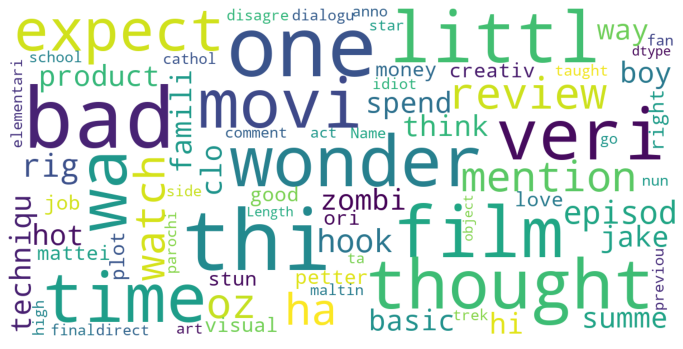

In [30]:
#reference https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
  
        max_words=10000,
        max_font_size=50, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
print (df['final'][0])
show_wordcloud(df['final'])


### Model processing

You can use a 70:30 train/test split.
The labels are 'positive' and negative, you should assign them integers 0 or 1 for further processing.

In [0]:
def translate(data):
  if(data=='positive'):
    return 1
  return 0
  

In [0]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
X_train,X_test,Y_train,Y_test=train_test_split(df['final'],df['sentiment'].apply(translate),test_size=0.3)

In [0]:
import numpy as np
X_train,X_test,Y_train,Y_test=np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)

### Tokenizer
You will need to use fit a tokenizer over your training and testing data.

What does a tokenizer do?
It creates a dictionary of word to integer mappings. It updates internal vocabulary based on a list of texts. You should read up on the documentation before diving into the code. 

You will also be using the the text_to_sequence function will return integers based on a respective tokenizer.

Make sure you **pad** your sequences to max length using sequence.pad_sequences()




In [0]:
# reference https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(num_words=1000,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=200)

In [18]:
print(len(X_train_seq_trunc[2]),"\n",Y_train[0])

100 
 1


### Embedding layer
You will be importing the embedding layer from Keras.
Embedding layers are common place when handling textual data. 
Word embeddings provide a dense representation of words and their relative meanings.

#### How do they work - via Stack Overflow
Link: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

The output vectors are not computed from the input using any mathematical operation. Instead, each input integer is used as the index to access a table that contains all posible vectors. That is the reason why you need to specify the size of the vocabulary as the first argument (so the table can be initialized).

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

Hope to see you soon

Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewritten as:

[0, 1, 2, 3, 4]

[5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embeding layer. In this case, we should initialize it as follows:

Embedding(7, 2, input_length=5)

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors.


### Model Engineering

You will be required to engineer three types of models from scratch.

1.   Using LSTMs
2.   Bi-directional LSTMs

1.   A model with less than 10,000 parameters - the lower the parameters, higher the score (provided accuracy is good)


For each model:

1.   You will be reporting graphs for validation accuracy and training loss.
2.   What hyper-parameters, loss functions, optimizations, initializations were used. This should be clearly stated in your analysis.

~90 percent and above is the desired accuracy. 

For model 3, CLEARLY report the number of parameters.




Answer no 2<br>
I used input size 100 for first two models and 200 for last model<br>
I used output dimension 50 for first two and 7 for last model<br>
I used embedding dimension 1000 for all models<br>
I used rmsprop as my optimizer in all models<br>
i used cross entropy as my loss function and no initialization
Parameters for model 3 are 9,362.

In [0]:
from keras.utils.np_utils import to_categorical
X_t, X_v, Y_t, Y_v = train_test_split(X_train_seq_trunc,to_categorical(Y_train), test_size=0.2, random_state=37)

In [0]:
# CODE HERE

# Some example code to help you get started
# X_train is your training data 
# input_dim is your dictionary length, output_dim is the length is the dimension of the dense embedding, you can choose whatever works best for you, starting with 2.
model = Sequential()
model.add(Embedding(1000, 50, input_length=100 ))
model.add(LSTM(50))
model.add(Dense(2,activation='sigmoid'))

# You can choose to complete this model per your choice


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
Total params: 70,200
Trainable params: 70,200
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
history = model.fit(X_t
                       , Y_t
                       , epochs=10
                       , validation_data=(X_v, Y_v)
                       , verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [0]:
# input_dim is your dictionary length, output_dim is the length is the dimension of the dense embedding, you can choose whatever works best for you, starting with 2.
model2 = Sequential()
model2.add(Embedding(1000, 50, input_length=100 ))
model2.add(Bidirectional(LSTM(50)))
model2.add(Dense(2,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 70,302
Trainable params: 70,302
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
history2 = model2.fit(X_t
                       , Y_t
                       , epochs=10
                       , validation_data=(X_v, Y_v)
                       , verbose=0)


In [142]:
model3 = Sequential()
model3.add(Embedding(1000, 7, input_length=200 ))
model3.add(Bidirectional(LSTM(10,dropout=0.5)))


model3.add(Dense(40,activation='relu'))
model3.add(Dense(2,activation='softmax'))
model3.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 200, 7)            7000      
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 20)                1440      
_________________________________________________________________
dense_33 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 82        
Total params: 9,362
Trainable params: 9,362
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
history3 = model3.fit(X_t
                       , Y_t
                      ,batch_size=64
                       , epochs=15
                       , validation_data=(X_v, Y_v)
                       , verbose=0)


### Model Predictions. For your best performing model

Come up with ten sample sentences NOT part of the original data set. 
Use model.predict() to generate predictions and report positive or negative sentiment.

In [0]:
def plotHistory(histories, names, metric):
    plt.clf() 
    x_axis = list(range(10))
    for hist, name in zip(histories, names):
        plt.plot(x_axis, hist.history[metric], label=metric+'_'+name)
        plt.scatter(x_axis, hist.history[metric])
    plt.legend()
    plt.title(metric)
    plt.show()

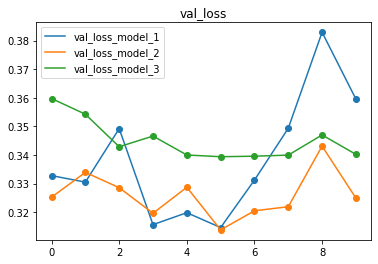

In [112]:
plotHistory([history,history2,history3],['model_1','model_2','model_3'],'val_loss')

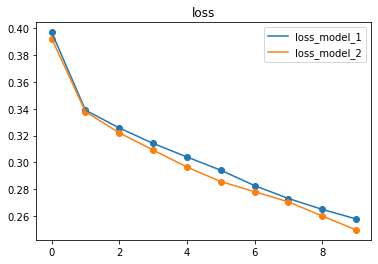

In [157]:
plotHistory([history,history2],['model_1','model_2'],'loss')

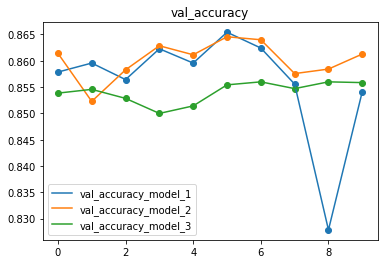

In [113]:
plotHistory([history,history2,history3],['model_1','model_2','model_3'],'val_accuracy')

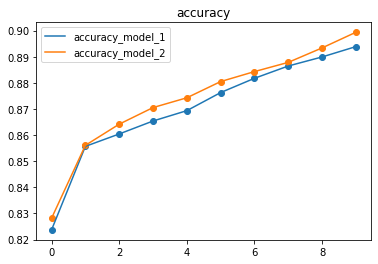

In [158]:
plotHistory([history,history2],['model_1','model_2'],'accuracy')

In [149]:
X_train_seq = tk.texts_to_sequences(["I absolutely love Amazon. Their selections, prices, notifications and returns are so easy and customer friendly. I am a disabled veteran with metal rods and screws in my lower back. My resistance to the cold is very low and the cold can be painful. I only bought Christmas presents in a store for 2 of my 14 grandchildren. I was also able to avoid the post office by having 4 gifts sent directly to 2 distant states.I have had a few returns and I love how easy it is to send them back. Some I just print a label, repack and leave for my mailman and others I take to a local Kohls. I do not have to package it up, I just show the QR code Amazon has sent (I show it on my phone or you can print it). It is only a few hours and the money is back in my account. Kohls will give you your return receipt and a 25% off in store coupon good for a week. Savvy, arent they. LOL. I have had a few issues that required a phone call directly to Amazon and have been taken care of with courtesy, friendliness and a quick resolution of the problem. As you can see I am in love with Amazon and will continue to buy a $5 or less item or a $1000 plus item. You just can\'t go wrong!"])
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
print("predicted")
predicted=model3.predict(X_train_seq_trunc.reshape(1,200))
print(np.where(predicted==predicted.max())[1])
print("\ntarget")
print(1)

predicted
[1]

target
1


In [150]:
X_train_seq = tk.texts_to_sequences(["We have shopped Amazon for years and always find them a pleasure do deal with. We live in a isolated area where there is no shopping unless you want to drive over 200 miles to the stores. It really doesn't matter because Amazon can deliver what we want or need when we want it and accepts returns without any hassles. You may find a product for less money at other places but when you figure tax and shipping it always comes in higher than with Amazon. We have bought a few items of clothing throughout the years and have also returned some. Other than this they are where we shop. We buy paper products from them as well, such as stables for house. We always check other outlets first but always end up going to Amazon.After many years of shopping with this store, without a doubt we know for a fact that we do not have any worries about a return or refunds with this outlet. If we have any issues we can always rely on a Rep. taking care of it without any stress on our part. They have always come through 100% for us. There just isnt any online store like this one for shopping for they cover anything one might want to buy, all lines of any product you are interested in along with reviews which greatly help in making decisions to purchase. They continue to be our number one online for us, cant see that ever changing."])
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
print("predicted")
predicted=model3.predict(X_train_seq_trunc.reshape(1,200))
print(np.where(predicted==predicted.max())[1])
print("\ntarget")
print(1)

predicted
[1]

target
1


In [153]:
X_train_seq = tk.texts_to_sequences(["No idea what happened in the movie, i know Mysterio or whatevs guy did an oopsie and bamm! he lost the Academy Award for the Most Contrived Sournois Villany Plot. Honestly if this is what i am to expect out of Superhero franchises then our daughters will be doing aliens by next yearPlot, oh the same crap, had go read wiki i had to understand what cobweb infested F was happening. It was such a mess, and with potential too. Why couldnt we get a movie where Peter spends his time as the new Stark-golden-boy?. Na that would have been too good watching all those cool tech at work, and would have also taken a lot of effort from the producers side too so F it.I guess the brain worm that infects the comics industry fans hasnt gotten to me yet so i cannot appreciate this masterpiece."])


X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
print("predicted")
predicted=model3.predict(X_train_seq_trunc.reshape(1,200))
print(np.where(predicted==predicted.max())[1])
print("\ntarget")
print(0)

predicted
[0]

target
0


In [154]:
X_train_seq = tk.texts_to_sequences(["Nothing to say about story, production, CGI and sounds. With the budget of a major production company, this is expected by default. I am definitely disappointed by the choice to put an insecure teenager, in the middle of an hormones storm given by puberty, to be a superhero. Perhaps they made this choice to capture teenagers attention and get them to the theaters, but it results in an idiot jumping around and get beaten by the bad guy all the time. He wins at the end because this is how it has to go, but i really doubt this could happen in practical. Too stupid to be a hero. Light years away from past productions where other actors and better scripts were able to make a teenager appears like a normal one"])
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
print("predicted")
predicted=model3.predict(X_train_seq_trunc.reshape(1,200))
print(np.where(predicted==predicted.max())[1])
print("\ntarget")
print(0)

predicted
[0]

target
0


In [155]:
X_train_seq = tk.texts_to_sequences(["I miss the old animated series from '94 and the Raimi movies. They captured the perfect spider-man in my opinion. They were the perfect blend of dark, serious and with good comedic jokes. The villains had depth and none of them were bad for the sake of filling a roleI enjoyed them quite a lot as a child/teen and as I got older I now enjoy them for different reasons. They are very entertaining, which cannot be said with other works portraying spider-man, including this movie.I don't even know where to start... Who thought it would be a good idea to put Iron Man and spider-man in a blender and see what comes out? The jokes are horrible and repetitive. Counting how many times he took off the mask in public, you might think he was acting like a rock star and not as a vigilante protecting his secret identity in order to protect the lives of the people close to him.Plot holes a dime a dozen and the way everything was dumbed down to the point of being unwatchable. They say yeah but its for kids so it must be like that but is that really true? I mean isnt the point of media/art to show kids interesting concepts so they can stimulate their growth and understanding of the world? Even if I had kids, I would not take them to something like this..."])
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=200)
print("predicted")
predicted=model3.predict(X_train_seq_trunc.reshape(1,200))
print(np.where(predicted==predicted.max())[1])
print("\ntarget")
print(0)

predicted
[1]

target
0
